In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import integrate

In [2]:
M1 = np.random.normal(40*1e4, 0.05*1e4, 1000)
M2 = np.random.normal(30*1e4, 0.1*1e4, 1000)
r = np.random.normal(3.2, 0.01, 1000)
G = 6.67384*1e-11

In [3]:
F = G*M1*M2/r**2

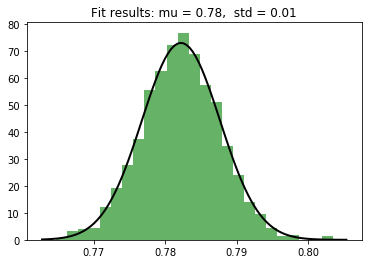

mu = 0.782205984328 std = 0.00545580777267


In [4]:
# Generate some data for this demonstration.
#data = norm.rvs(10.0, 2.5, size=500)

# Fit a normal distribution to the data:
mu, std = norm.fit(F)

# Plot the histogram.
plt.hist(F, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()
print('mu =', mu, 'std =', std)

In [5]:
sigmaM1 = 0.05*1e4
sigmaM2 = 0.1*1e4
sigmar = 0.01
_1 = (G*M2/r**2)*sigmaM1
_2 = (G*M1/r**2)*sigmaM2
_3 = (-2*G*M1*M2/r**3)*sigmar
sigmaF = np.mean(np.sqrt(_1**2 + _2**2 + _3**2))
print('std =', sigmaF)

std = 0.00562675071043


Второй набор данных

In [6]:
_M1 = np.random.normal(40*1e4, 2*1e4, size=1000)
_M2 = np.random.normal(30*1e4, 10*1e4, size=1000)
_r = np.random.normal(3.2, 1, size=1000)

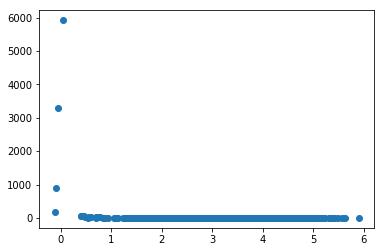

In [7]:
_F = G*_M1*_M2/_r**2
plt.plot(_r, _F, 'o')
plt.show()

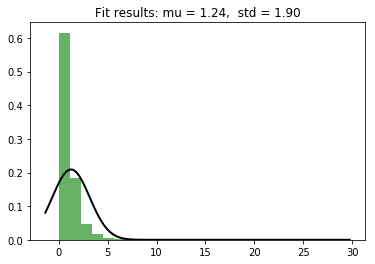

mu = 1.23684164496 std = 1.90409232614


In [8]:
# Generate some data for this demonstration.
#data = norm.rvs(10.0, 2.5, size=500)

# Fit a normal distribution to the data:
mu, std = norm.fit(_F[_F < 30])

# Plot the histogram.
plt.hist(_F[_F < 30], bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()
print('mu =', mu, 'std =', std)

In [9]:
sigma_M1 = 0.05*1e4
sigma_M2 = 0.1*1e4
sigma_r = 0.01
_11 = (G*_M2/_r**2)*sigmaM1
_22 = (G*_M1/_r**2)*sigmaM2
_33 = (-2*G*_M1*_M2/_r**3)*sigmar
sigma_F = np.mean(np.sqrt(_11**2 + _22**2 + _33**2))
print('std =', sigma_F)

std = 4.00038950516


ADD SEED!

In [76]:
def x_n(f, N):
    t = np.linspace(0, 2*np.pi, N)
    x_n = []
    for i in range (t.size):
        s = f(t[i]) 
        x_n.append(s)
    return np.array(x_n)

def fourier(x_n):
    X = []
    N = x_n.size 
    for k in range (N):
        s = 0*1j
        for t in range(N):
            arg = 1j * 2 * np.pi * k * t / N
            s += x_n[t]*np.exp(arg)
        X.append(s)
    return np.array(X)

In [77]:
x_n_sin = x_n(np.sin, 100)
print(fourier(x_n_sin))

X =  [(1.4204051771082641e-15+0j)]
X =  [(1.4204051771082641e-15+0j), (1.5623783319855762+49.715684638777503j)]
X =  [(1.4204051771082641e-15+0j), (1.5623783319855762+49.715684638777503j), (-0.042585036286100095-0.67686976892717743j)]
X =  [(1.4204051771082641e-15+0j), (1.5623783319855762+49.715684638777503j), (-0.042585036286100095-0.67686976892717743j), (-0.035778760480059388-0.378499750112747j)]
X =  [(1.4204051771082641e-15+0j), (1.5623783319855762+49.715684638777503j), (-0.042585036286100095-0.67686976892717743j), (-0.035778760480059388-0.378499750112747j), (-0.03388334764024617-0.26821431449289762j)]
X =  [(1.4204051771082641e-15+0j), (1.5623783319855762+49.715684638777503j), (-0.042585036286100095-0.67686976892717743j), (-0.035778760480059388-0.378499750112747j), (-0.03388334764024617-0.26821431449289762j), (-0.033072416187367115-0.20881101779690758j)]
X =  [(1.4204051771082641e-15+0j), (1.5623783319855762+49.715684638777503j), (-0.042585036286100095-0.67686976892717743j), (-0.0